In [45]:
import pandas as pd
import numpy as np
np.random.seed(0)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) 
#sort_by_target(mnist) 

In [26]:
# from sklearn import datasets
# digits = datasets.load_digits()

In [46]:
X, y = mnist['data'], mnist['target']

In [47]:
X.shape, y.shape

((70000, 784), (70000,))

In [55]:
y[1565]

4

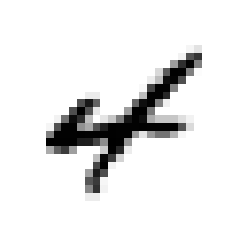

In [54]:
some_digit = X[1565]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()